In [3]:
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
data_dir = 'data'
qog_dataset_filename = 'qog_std_ts_jan22.csv'
df = pd.read_csv(join(data_dir, qog_dataset_filename), low_memory=False)

In [5]:
df.info(verbose=True, memory_usage='deep', show_counts=True)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15168 entries, 0 to 15167
Data columns (total 1913 columns):
 #     Column                  Non-Null Count  Dtype  
---    ------                  --------------  -----  
 0     ccode                   15168 non-null  int64  
 1     cname                   15168 non-null  object 
 2     year                    15168 non-null  int64  
 3     ccode_qog               15168 non-null  int64  
 4     cname_qog               15168 non-null  object 
 5     ccodealp                15168 non-null  object 
 6     ccodecow                14511 non-null  float64
 7     version                 15168 non-null  object 
 8     cname_year              15168 non-null  object 
 9     ccodealp_year           15168 non-null  object 
 10    aid_cpnc                1066 non-null   float64
 11    aid_cpsc                1066 non-null   float64
 12    aid_crnc                5775 non-null   float64
 13    aid_crnio               6231 non-null   float64
 14    ai

,ccode,year,ccode_qog,ccodecow,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,aid_crsc,aid_crsio,...,wwbi_rrespubpemp,wwbi_sprpempn,wwbi_sprpempp,wwbi_sprpemps,wwbi_sprpempt,wwbi_spupempn,wwbi_spupempp,wwbi_spupemps,wwbi_spupempt,wwbi_tertiarypubsec
count,15168.000000,15168.000000,15168.000000,14511.000000,1066.000000,1.066000e+03,5775.000000,6231.000000,5.775000e+03,6.231000e+03,...,807.000000,811.000000,814.000000,796.000000,803.000000,802.000000,816.000000,792.000000,766.000000,832.000000
mean,439.856145,1983.361617,443.619396,466.535869,59.080675,2.427889e+09,10.905628,4.929546,4.481609e+08,6.054327e+08,...,0.279442,0.053310,0.254760,0.451854,0.224524,0.014515,0.113011,0.364009,0.504508,0.384806
std,260.168527,21.933466,263.321112,263.610087,44.968169,4.578501e+09,7.055762,3.668924,9.392950e+08,1.948375e+09,...,0.170261,0.106817,0.162032,0.169566,0.123866,0.032932,0.087802,0.145130,0.161738,0.119762
min,4.000000,1946.000000,4.000000,2.000000,1.000000,1.714000e+03,1.000000,1.000000,1.019000e+03,2.090000e+03,...,0.000000,0.000000,0.000000,0.001544,0.000000,0.000000,0.000000,0.001802,0.000000,0.081254
25%,208.000000,1964.000000,212.000000,265.000000,16.000000,1.951861e+08,5.000000,2.000000,3.598115e+07,4.029053e+07,...,0.163278,0.000737,0.131515,0.340751,0.129288,0.000181,0.049140,0.255419,0.402225,0.315932
50%,434.000000,1983.000000,434.000000,450.000000,55.500000,8.462487e+08,10.000000,4.000000,1.431745e+08,1.702048e+08,...,0.256386,0.010639,0.231198,0.442792,0.221410,0.003049,0.090358,0.349934,0.505470,0.364594
75%,674.000000,2002.000000,678.000000,690.000000,99.000000,1.984689e+09,16.000000,7.000000,4.555619e+08,4.926637e+08,...,0.375188,0.043745,0.362823,0.554021,0.302362,0.010830,0.158922,0.439092,0.625884,0.444397
max,999.000000,2021.000000,999.000000,990.000000,160.000000,2.770024e+10,35.000000,18.000000,2.451829e+10,6.168757e+10,...,0.931155,0.750023,0.800782,0.999261,0.638901,0.254969,0.604096,1.000000,0.843402,0.851152


<AxesSubplot:>

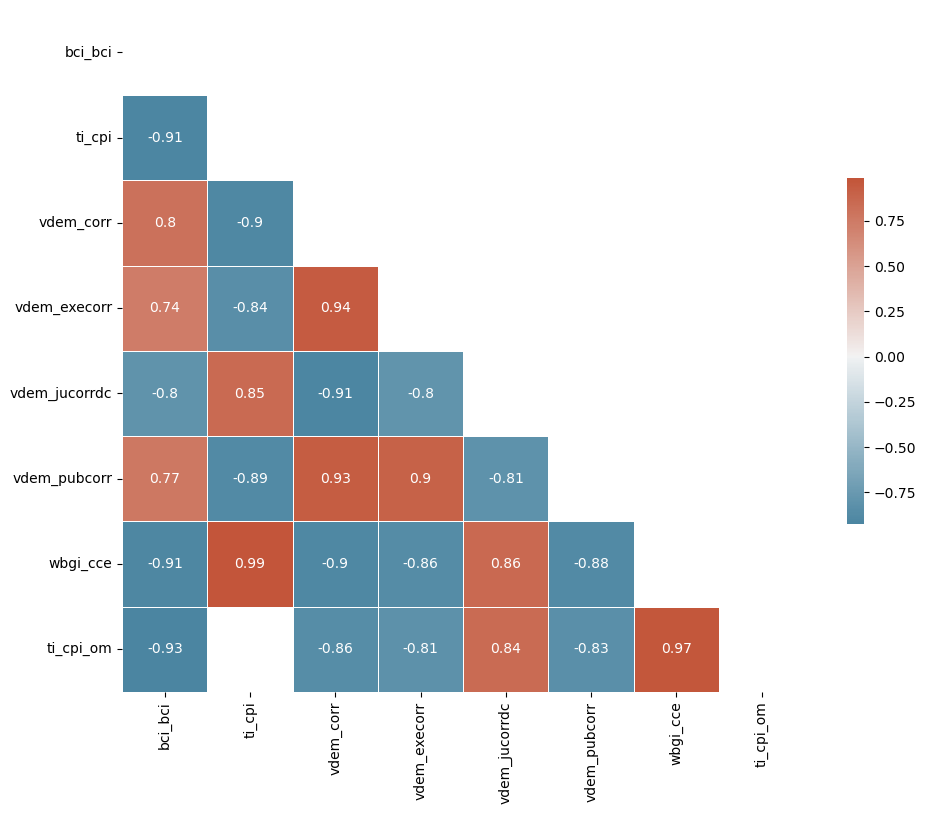

In [6]:
corruption_col = ['bci_bci', 'ti_cpi', 'vdem_corr', 'vdem_execorr', 'vdem_jucorrdc', 'vdem_pubcorr', 'wbgi_cce', 'ti_cpi_om']
identication_col = ['ccode', 'ccode_qog', 'ccodealp', 'ccodealp_year', 'ccodecow', 'cname', 'cname_qog', 'cname_year', 'version', 'year']
corruption_corr = df[corruption_col].corr()
mask = np.triu(np.ones_like(corruption_corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corruption_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


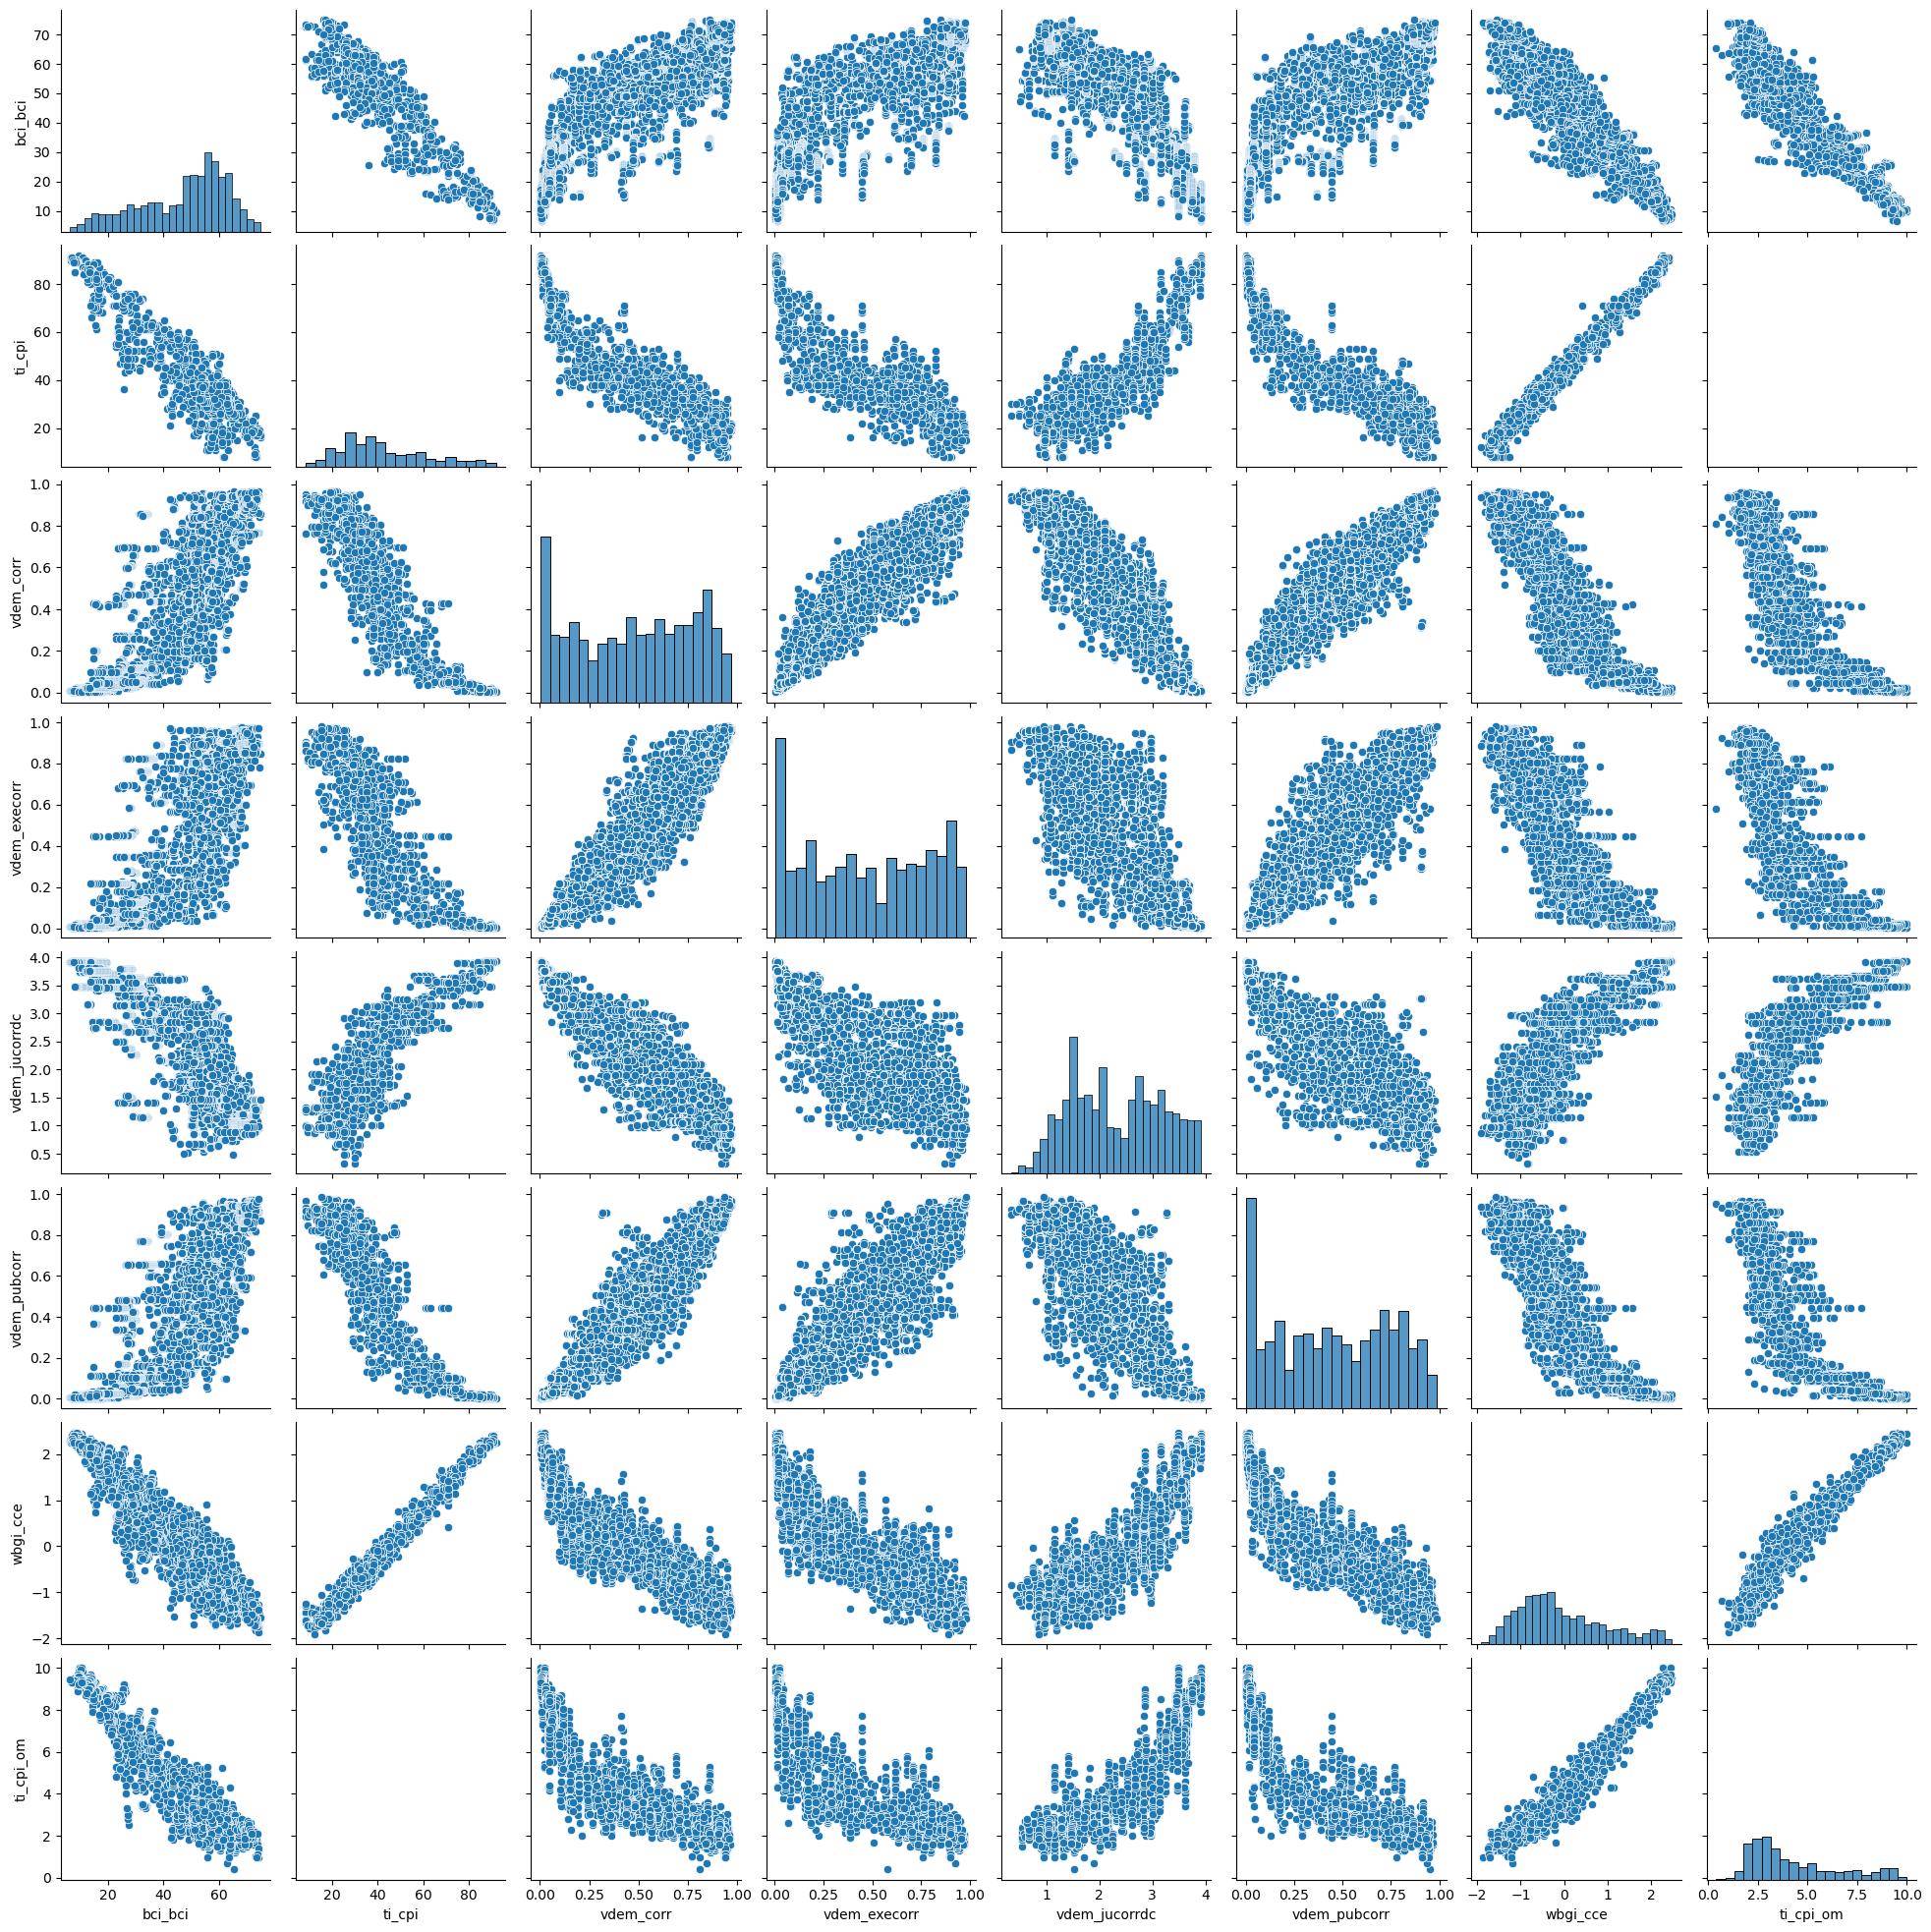

In [12]:
sns.pairplot(df[corruption_col])



<AxesSubplot:>

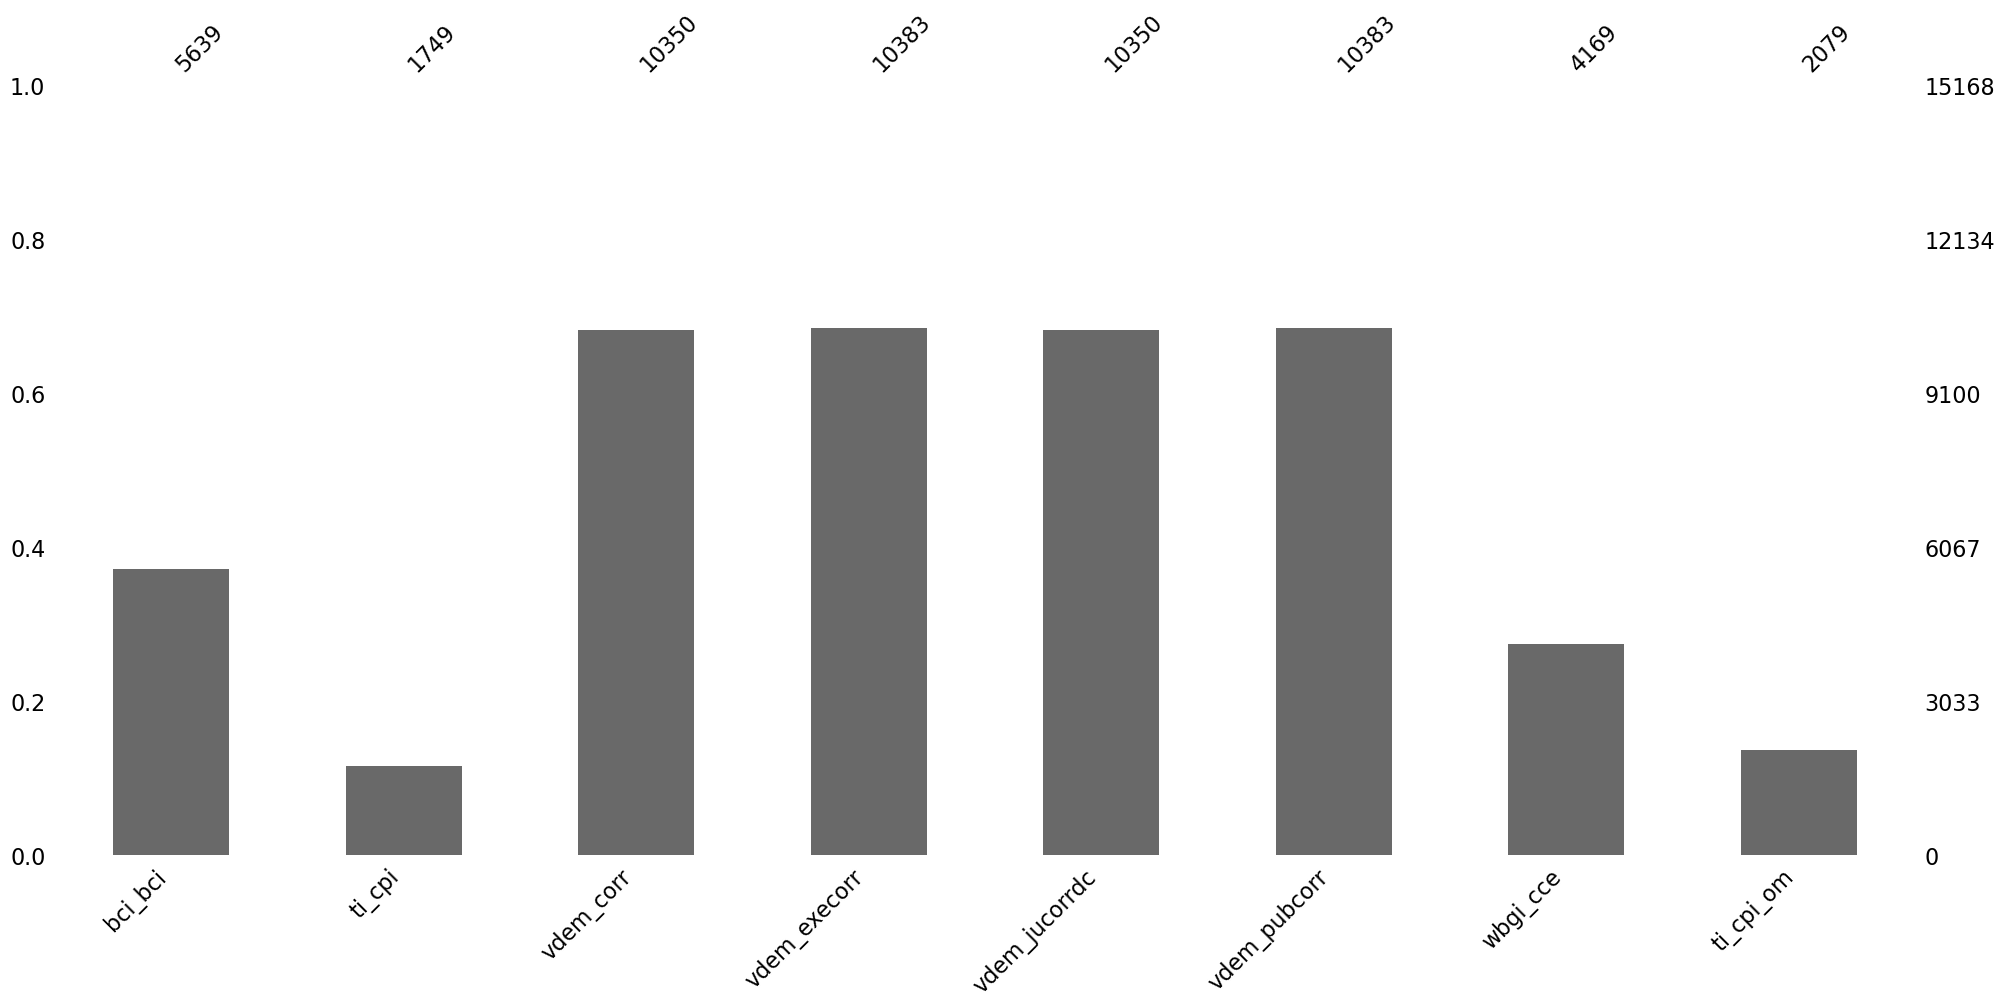

In [13]:
msno.bar(df[corruption_col])

CPI has a new and old methodology therefore non of the values exist at the same time

<AxesSubplot:>

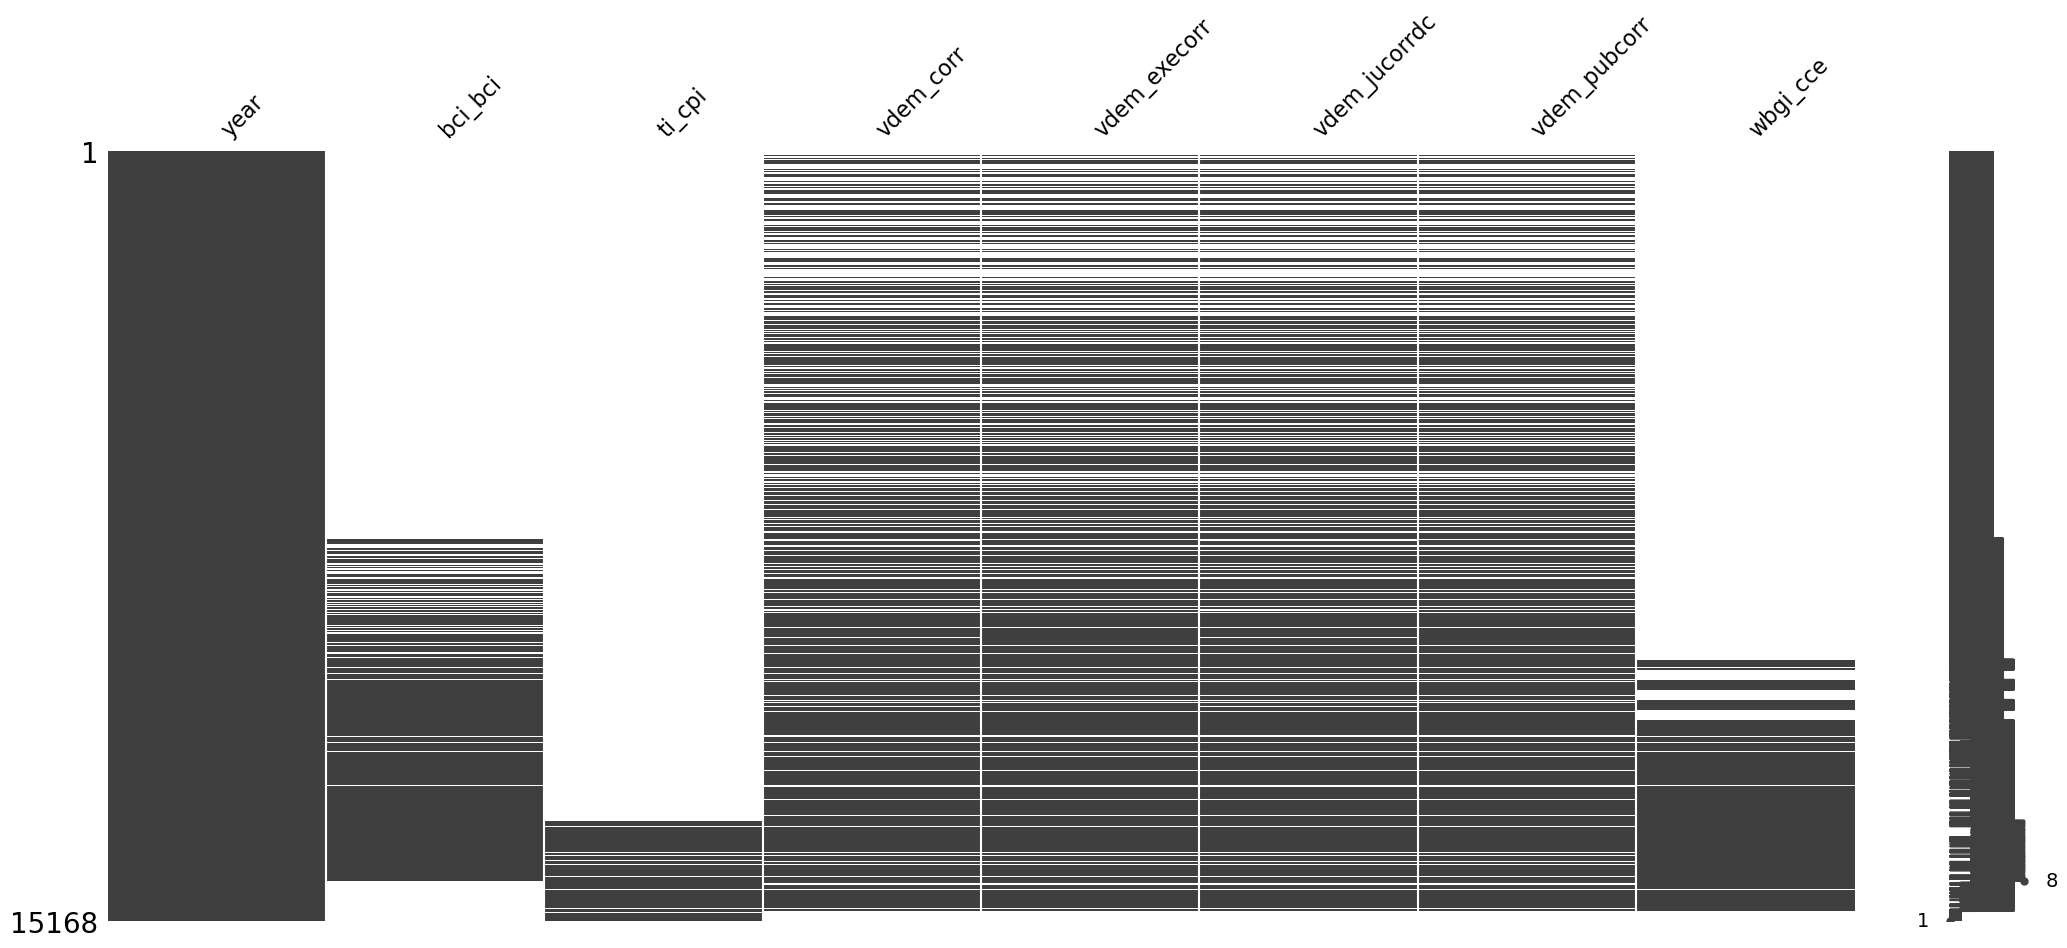

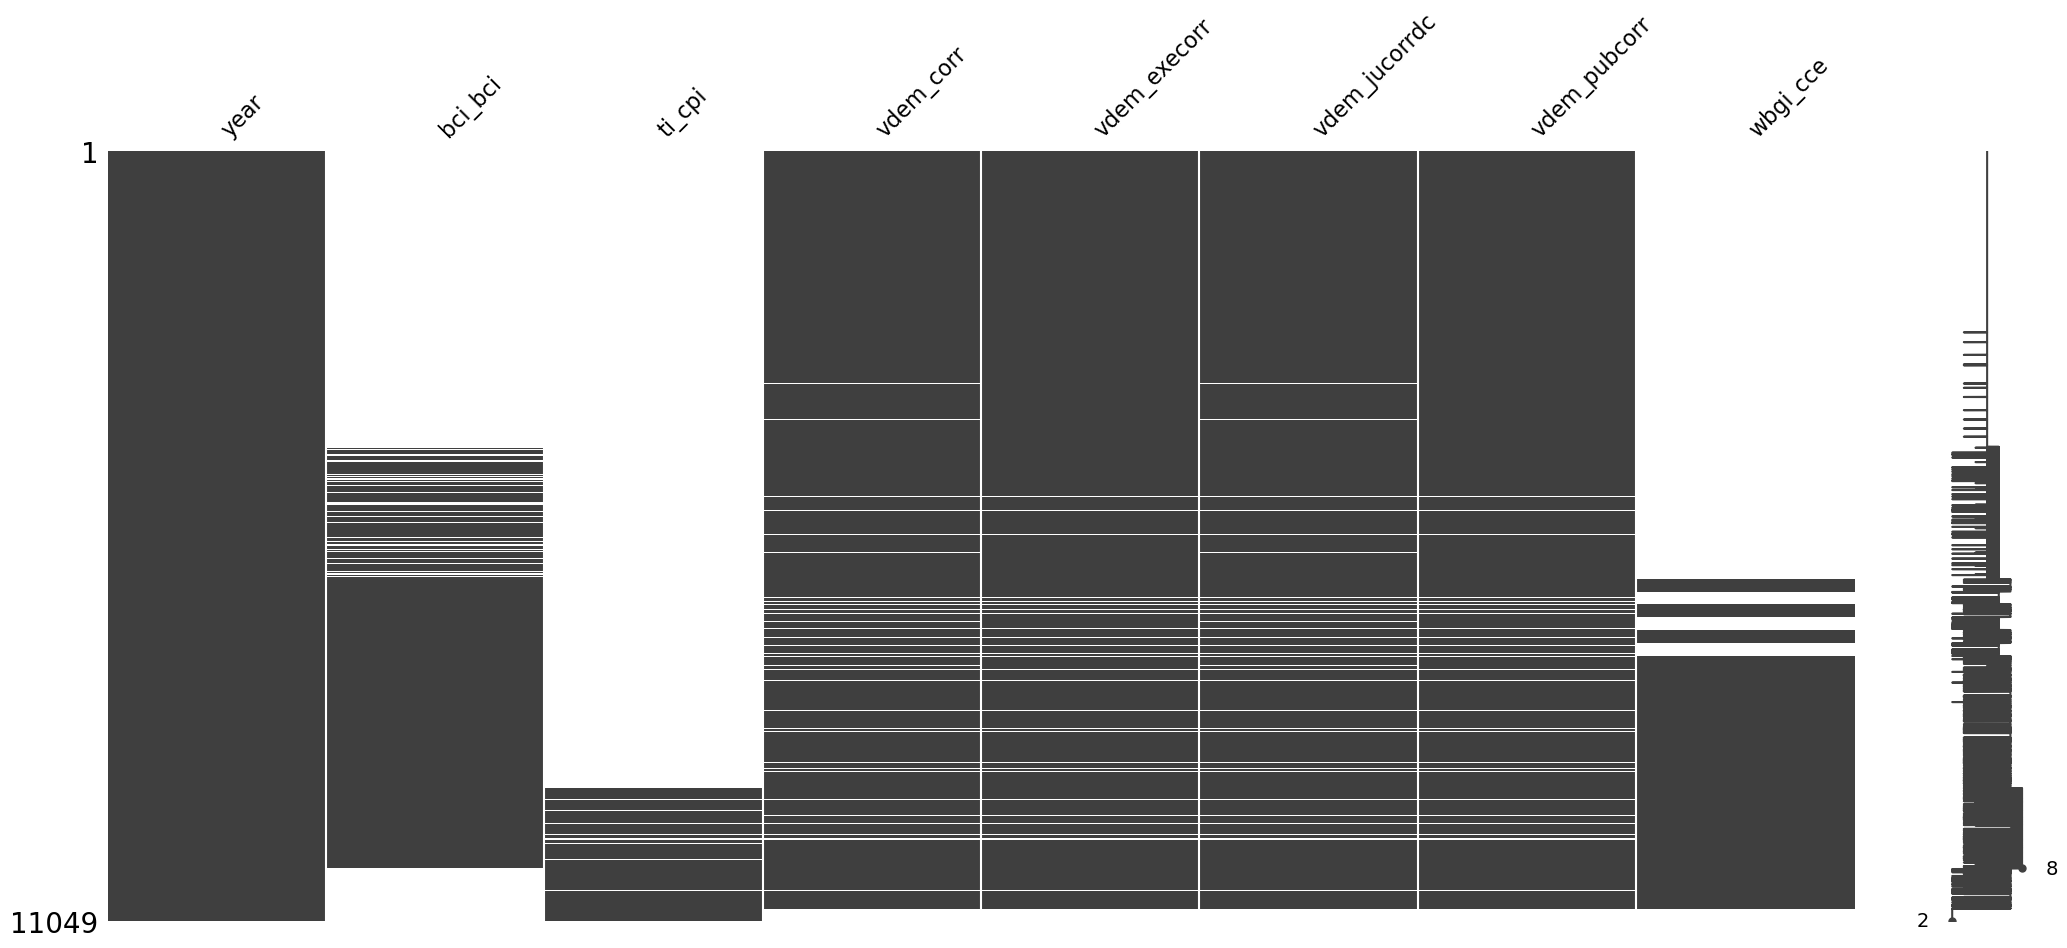

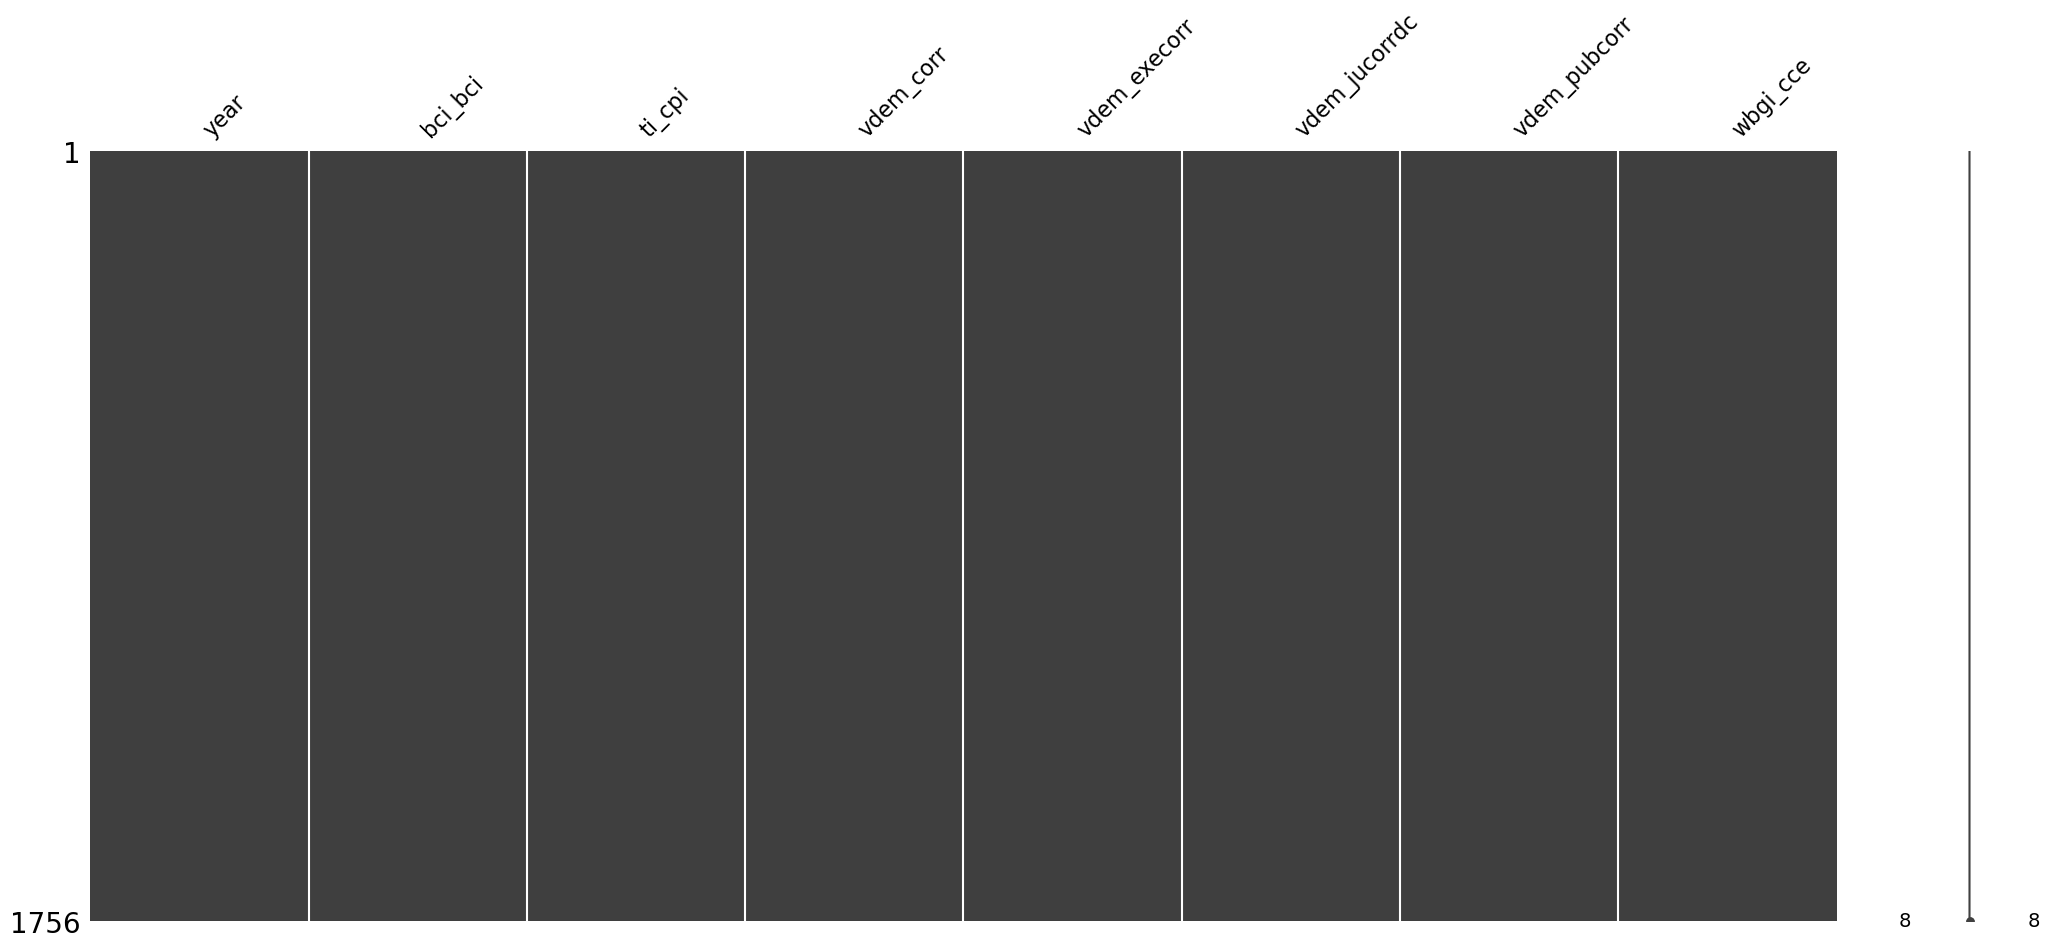

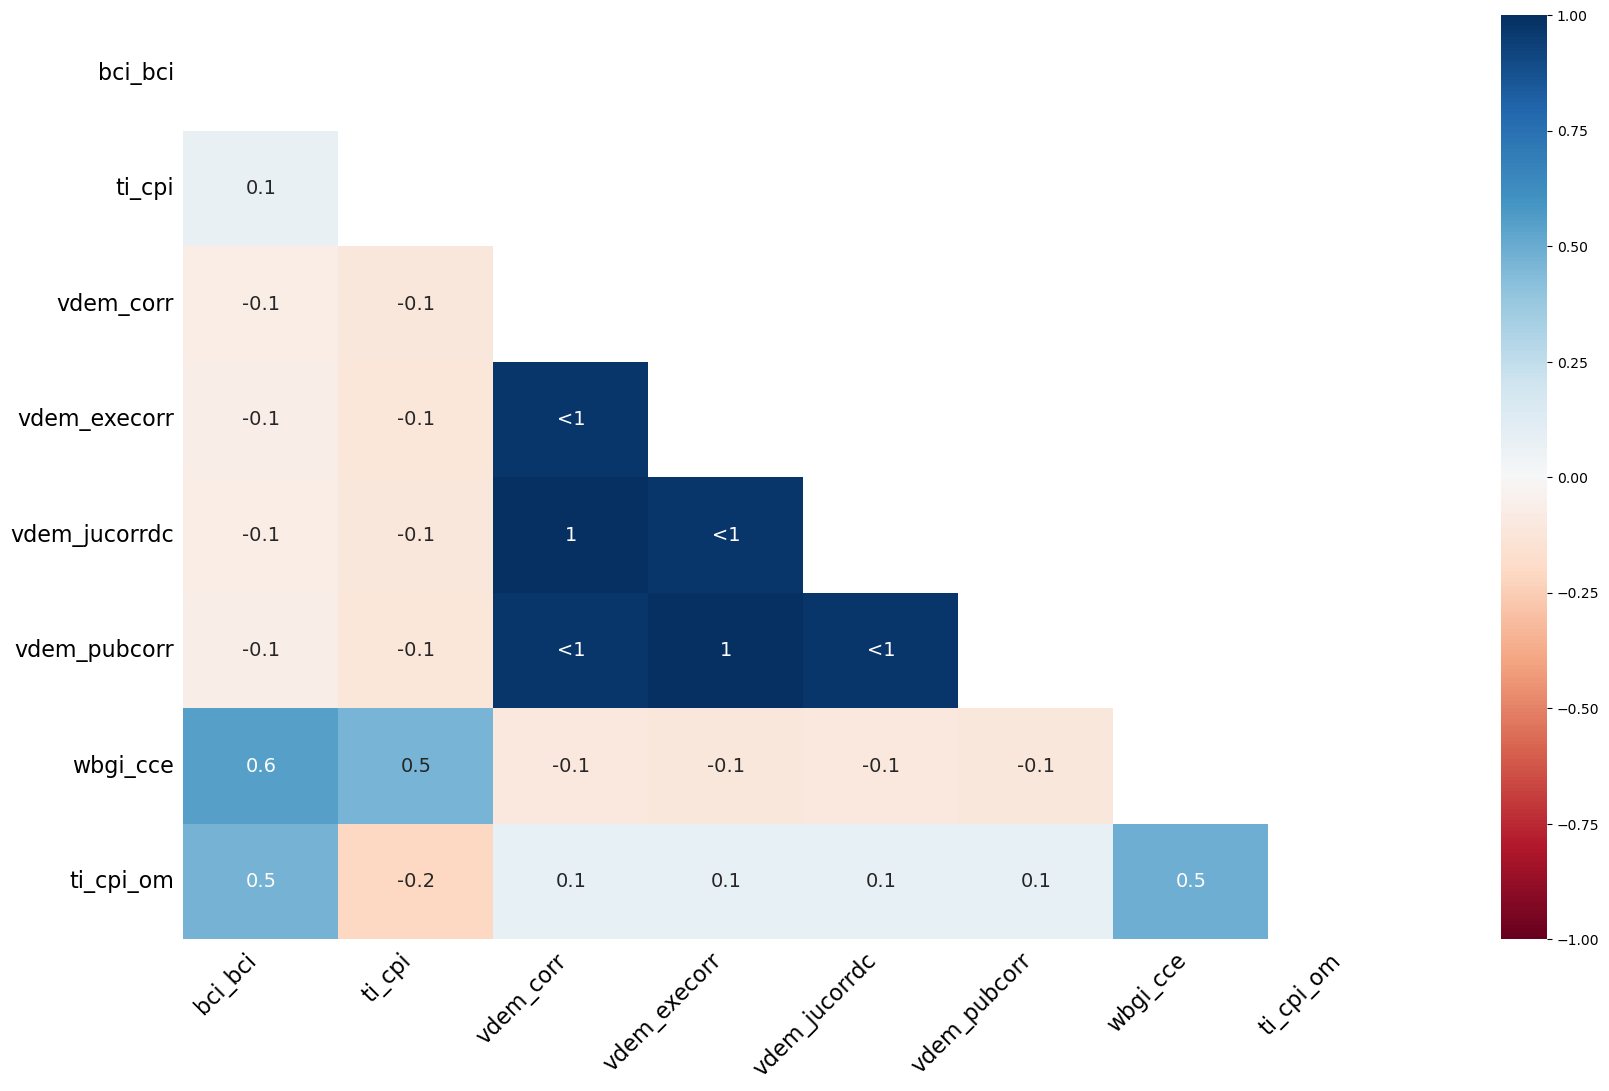

In [27]:
corruption_col = ['bci_bci', 'ti_cpi', 'vdem_corr', 'vdem_execorr', 'vdem_jucorrdc', 'vdem_pubcorr', 'wbgi_cce', 'ti_cpi_om']

# drop every row where non of the corruption data is available
df_any_corruption_info_available = df.dropna(subset=corruption_col, axis=0, how="all")

# display(df)
#display(df_any_corruption_info_available)
#15k to 11k rows

# drop every row where not every corruption data is available
# CPI dofferent methodology must first be merged
df_cpi_combined = df.copy()
df_cpi_combined['ti_cpi']=df['ti_cpi'].combine_first(df['ti_cpi_om'])
df_all_corruption_info_available = df_cpi_combined.dropna(subset=corruption_col, axis=0, how='any')
#display(df_all_corruption_info_available)
#11k to 1.7k rows

corruption_col_with_year = ['year','bci_bci', 'ti_cpi', 'vdem_corr', 'vdem_execorr', 'vdem_jucorrdc', 'vdem_pubcorr', 'wbgi_cce']
msno.matrix(df[corruption_col_with_year].sort_values(by='year'))
msno.matrix(df_any_corruption_info_available[corruption_col_with_year].sort_values(by='year'))
msno.matrix(df_all_corruption_info_available[corruption_col_with_year].sort_values(by='year'))
msno.heatmap(df_any_corruption_info_available[corruption_col])


In [24]:
df[corruption_col].describe()


,bci_bci,ti_cpi,vdem_corr,vdem_execorr,vdem_jucorrdc,vdem_pubcorr,wbgi_cce,ti_cpi_om
count,5639.000000,1749.000000,10350.000000,10383.000000,10350.000000,10383.000000,4169.000000,2079.000000
mean,47.174155,42.894225,0.474636,0.469259,2.332004,0.450960,-0.063370,4.281378
std,15.800084,19.277176,0.295443,0.310619,0.866247,0.298384,0.996724,2.252644
min,6.450336,8.000000,0.002000,0.004000,0.331000,0.001000,-1.905176,0.400000
25%,35.686182,29.000000,0.197000,0.183000,1.568000,0.171000,-0.807224,2.600000
50%,51.142929,38.000000,0.493000,0.457000,2.259000,0.446000,-0.299217,3.424892
75%,58.971246,56.000000,0.741000,0.761000,3.076000,0.717000,0.559003,5.542271
max,74.962990,92.000000,0.968000,0.981000,3.925000,0.986000,2.469991,10.000000


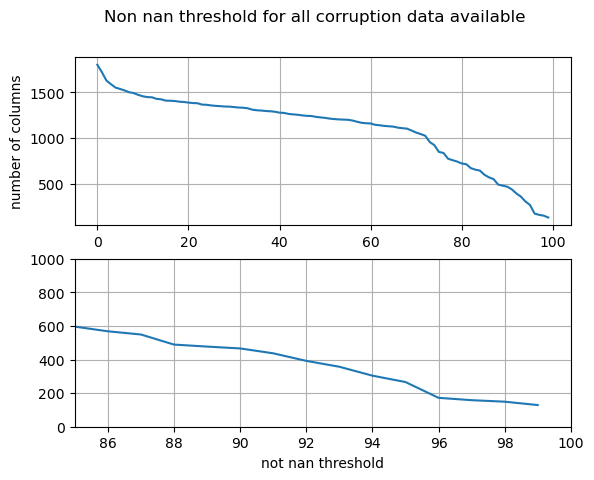

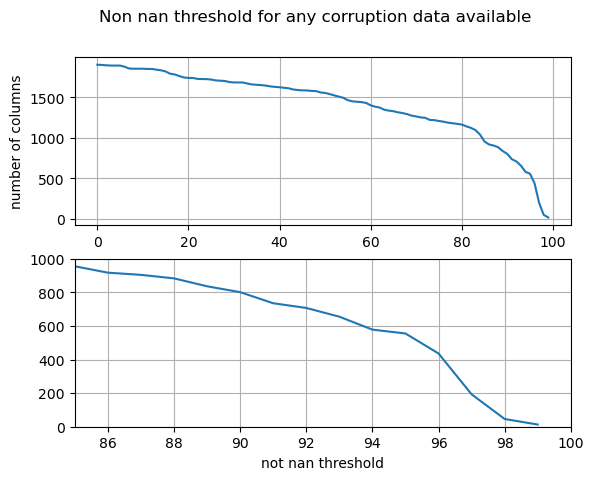

In [17]:
df[corruption_col].summary()


def plot_not_nan_threshold(df, plotname):
    length = df.shape[0]
    percent_nan = (df.isna().sum().values/length)*100
    column_count = []
    percent_nan
    for i in range (100):
        column_count.append((percent_nan > i).sum())

    fig, (ax1, ax2) = plt.subplots(2)

    ax1.plot(column_count)
    fig.suptitle(f"{plotname}")
    ax1.grid()
    ax1.set_ylabel('number of columns')

    ax2.plot(column_count)
    ax2.set_xlim([85, 100])
    ax2.set_ylim([0, 1000])
    ax2.grid()
    ax2.set_xlabel('not nan threshold')

plot_not_nan_threshold(df_all_corruption_info_available, "Non nan threshold for all corruption data available")
plot_not_nan_threshold(df_any_corruption_info_available, "Non nan threshold for any corruption data available")


In [26]:
def clean_data_for_corruption(df, target_column, threshold):
    if target_column not in corruption_col:
        print('arget column not in corruption columns')
        return
    #drop all corruption columns but the target_column
    columns_to_drop = [col for col in corruption_col if col != 'target_column']
    columns_reduced = df.drop(labels=columns_to_drop)

#
display(df_all_corruption_info_available)
df_without_corruption = df_all_corruption_info_available.drop(columns=corruption_col)

treshhold = (df_without_corruption.shape[0]/100)*100
df_columns_reduced = df_without_corruption.dropna(axis='columns', thresh=treshhold)
display(df_columns_reduced)






,ccode,cname,year,ccode_qog,cname_qog,ccodealp,ccodecow,version,cname_year,ccodealp_year,...,wwbi_rrespubpemp,wwbi_sprpempn,wwbi_sprpempp,wwbi_sprpemps,wwbi_sprpempt,wwbi_spupempn,wwbi_spupempp,wwbi_spupemps,wwbi_spupempt,wwbi_tertiarypubsec
59,4,Afghanistan,2005,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 2005,AFG05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,4,Afghanistan,2007,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 2007,AFG07,...,0.462140,0.741395,0.128090,0.117742,0.012774,0.168941,0.096384,0.446096,0.288579,0.677745
62,4,Afghanistan,2008,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 2008,AFG08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,4,Afghanistan,2009,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 2009,AFG09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,4,Afghanistan,2010,4,Afghanistan,AFG,700.0,QoGStdTSjan22,Afghanistan 2010,AFG10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14924,894,Zambia,2007,894,Zambia,ZMB,551.0,QoGStdTSjan22,Zambia 2007,ZMB07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14925,894,Zambia,2008,894,Zambia,ZMB,551.0,QoGStdTSjan22,Zambia 2008,ZMB08,...,0.289702,0.060219,0.344901,0.494653,0.100227,0.007814,0.080089,0.486490,0.425608,0.494307
14926,894,Zambia,2009,894,Zambia,ZMB,551.0,QoGStdTSjan22,Zambia 2009,ZMB09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14927,894,Zambia,2010,894,Zambia,ZMB,551.0,QoGStdTSjan22,Zambia 2010,ZMB10,...,0.371744,0.045391,0.313478,0.522755,0.118377,0.009228,NaN,0.284238,0.374442,0.393869


,ccode,cname,year,ccode_qog,cname_qog,ccodealp,version,cname_year,ccodealp_year,bci_bcistd,...,wbgi_pvs,wbgi_rle,wbgi_rln,wbgi_rls,wbgi_rqe,wbgi_rqn,wbgi_rqs,wbgi_vae,wbgi_van,wbgi_vas
59,4,Afghanistan,2005,4,Afghanistan,AFG,QoGStdTSjan22,Afghanistan 2005,AFG05,4.249225,...,0.304017,-1.658668,7.0,0.206080,-1.637369,4.0,0.182854,-1.125430,8.0,0.173295
61,4,Afghanistan,2007,4,Afghanistan,AFG,QoGStdTSjan22,Afghanistan 2007,AFG07,4.031425,...,0.308107,-1.829666,8.0,0.253809,-1.688257,4.0,0.240884,-1.057654,10.0,0.145505
62,4,Afghanistan,2008,4,Afghanistan,AFG,QoGStdTSjan22,Afghanistan 2008,AFG08,3.909109,...,0.310743,-1.864380,9.0,0.222266,-1.621583,5.0,0.210499,-1.168902,10.0,0.143899
63,4,Afghanistan,2009,4,Afghanistan,AFG,QoGStdTSjan22,Afghanistan 2009,AFG09,3.786836,...,0.293825,-1.847092,10.0,0.181451,-1.674311,6.0,0.191016,-1.375496,10.0,0.147715
64,4,Afghanistan,2010,4,Afghanistan,AFG,QoGStdTSjan22,Afghanistan 2010,AFG10,3.640700,...,0.282070,-1.845427,10.0,0.181408,-1.532861,6.0,0.186744,-1.404468,10.0,0.143255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14924,894,Zambia,2007,894,Zambia,ZMB,QoGStdTSjan22,Zambia 2007,ZMB07,2.732052,...,0.262606,-0.525239,15.0,0.152124,-0.492879,9.0,0.177725,-0.206985,16.0,0.117468
14925,894,Zambia,2008,894,Zambia,ZMB,QoGStdTSjan22,Zambia 2008,ZMB08,2.443199,...,0.264087,-0.408001,15.0,0.147672,-0.464850,9.0,0.174121,-0.161100,16.0,0.113796
14926,894,Zambia,2009,894,Zambia,ZMB,QoGStdTSjan22,Zambia 2009,ZMB09,2.238146,...,0.246402,-0.475537,16.0,0.137825,-0.527445,10.0,0.163300,-0.300324,17.0,0.112267
14927,894,Zambia,2010,894,Zambia,ZMB,QoGStdTSjan22,Zambia 2010,ZMB10,2.080949,...,0.243547,-0.490231,16.0,0.135218,-0.496291,10.0,0.162987,-0.243016,17.0,0.110313


In [ ]:
def drop_values(df, min_percentage_non_nan, exclude_columns):
    df_without_exclude_columns = df.drop(columns = exclude_columns)
    mask = np.logical_or.reduce(df_without_exclude_columns.isnull(), axis = 0)

    


    return df.drop(columns = df_without_exclude_columns.loc[:,mask].columns.values.tolist())

df_reduced = drop_values(df_cpi_combined_all_corruption_indices, 99, corruption_columns)
# display(df_reduced)
print(df_reduced.columns.values.tolist())
df_reduced = drop_values(df_any_corruption_index_available, 99, corruption_columns)
# display(df_reduced)
print(df_reduced.columns.values.tolist())





/home/david/miniconda3/envs/dopp/lib/python3.10/site-packages/seaborn/distributions.py:264: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  curves.iloc[:, cols] = (curves
/home/david/miniconda3/envs/dopp/lib/python3.10/site-packages/seaborn/distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


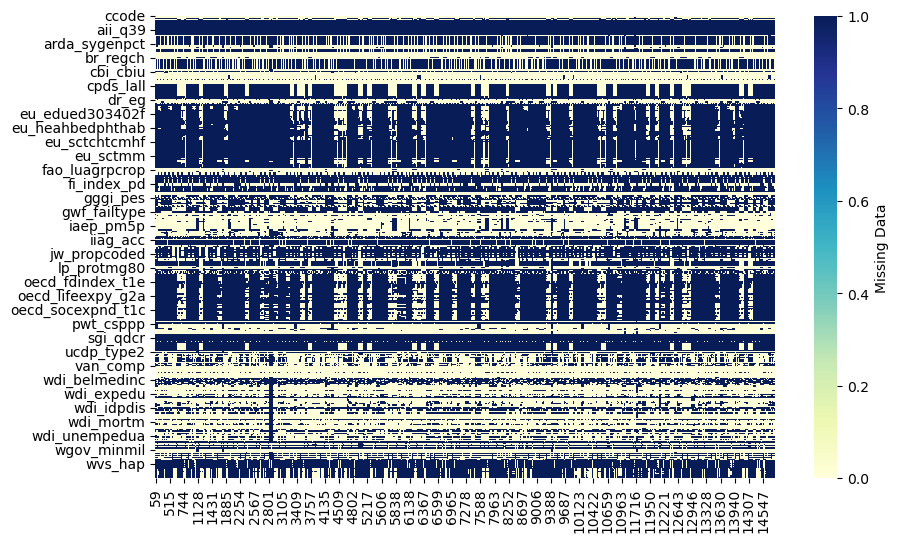

<Figure size 1000x600 with 0 Axes>

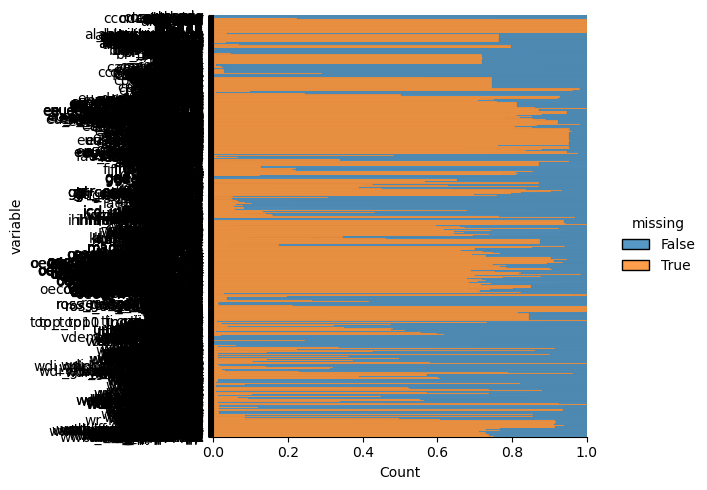

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cpi_combined_all_corruption_indices.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})


plt.figure(figsize=(10,6))
sns.displot(
    data=df_cpi_combined_all_corruption_indices.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

['ccode', 'cname', 'year', 'ccode_qog', 'cname_qog', 'ccodealp', 'version', 'cname_year', 'ccodealp_year', 'bci_bci', 'bci_bcistd', 'bmr_dem', 'bmr_dembr', 'bmr_demdur', 'bmr_demfsuf', 'bmr_demtran', 'br_com', 'br_coup', 'br_cw', 'br_dem', 'br_elecpost', 'br_elect', 'br_elecyear', 'br_fcoup', 'br_mon', 'br_newconst', 'br_pres', 'br_regch', 'br_scoup', 'br_suff', 'ciri_assn', 'ciri_disap', 'ciri_dommov', 'ciri_elecsd', 'ciri_formov', 'ciri_injud', 'ciri_kill', 'ciri_speech', 'ciri_tort', 'ciri_wecon', 'ciri_wopol', 'ciri_worker', 'fh_cl', 'fh_ipolity2', 'fh_pr', 'fh_status', 'gea_ea1524f', 'gea_ea1524m', 'gea_ea2534f', 'gea_ea2534m', 'gea_ea3544f', 'gea_ea3544m', 'gea_ea4554f', 'gea_ea4554m', 'gea_ea5564f', 'gea_ea5564m', 'gea_ea65f', 'gea_ea65m', 'gle_cgdpc', 'gle_gdp', 'gle_pop', 'gle_rgdpc', 'ht_colonial', 'ht_region', 'ihme_hle_0104f', 'ihme_hle_0104m', 'ihme_hle_0104t', 'ihme_lifexp_0104f', 'ihme_lifexp_0104m', 'ihme_lifexp_0104t', 'nrmi_nrpi', 'ti_cpi', 'ti_cpi_om', 'van_comp', 'v

In [ ]:
# Remove all data that does not have any information on selected corruption metrics# 
corruption_columns = ['bci_bci', 'ti_cpi', 'vdem_corr', 'vdem_execorr', 'vdem_jucorrdc', 'vdem_pubcorr', 'wbgi_cce', 'ti_cpi_om', 'gle_cgdpc']





ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (1913).

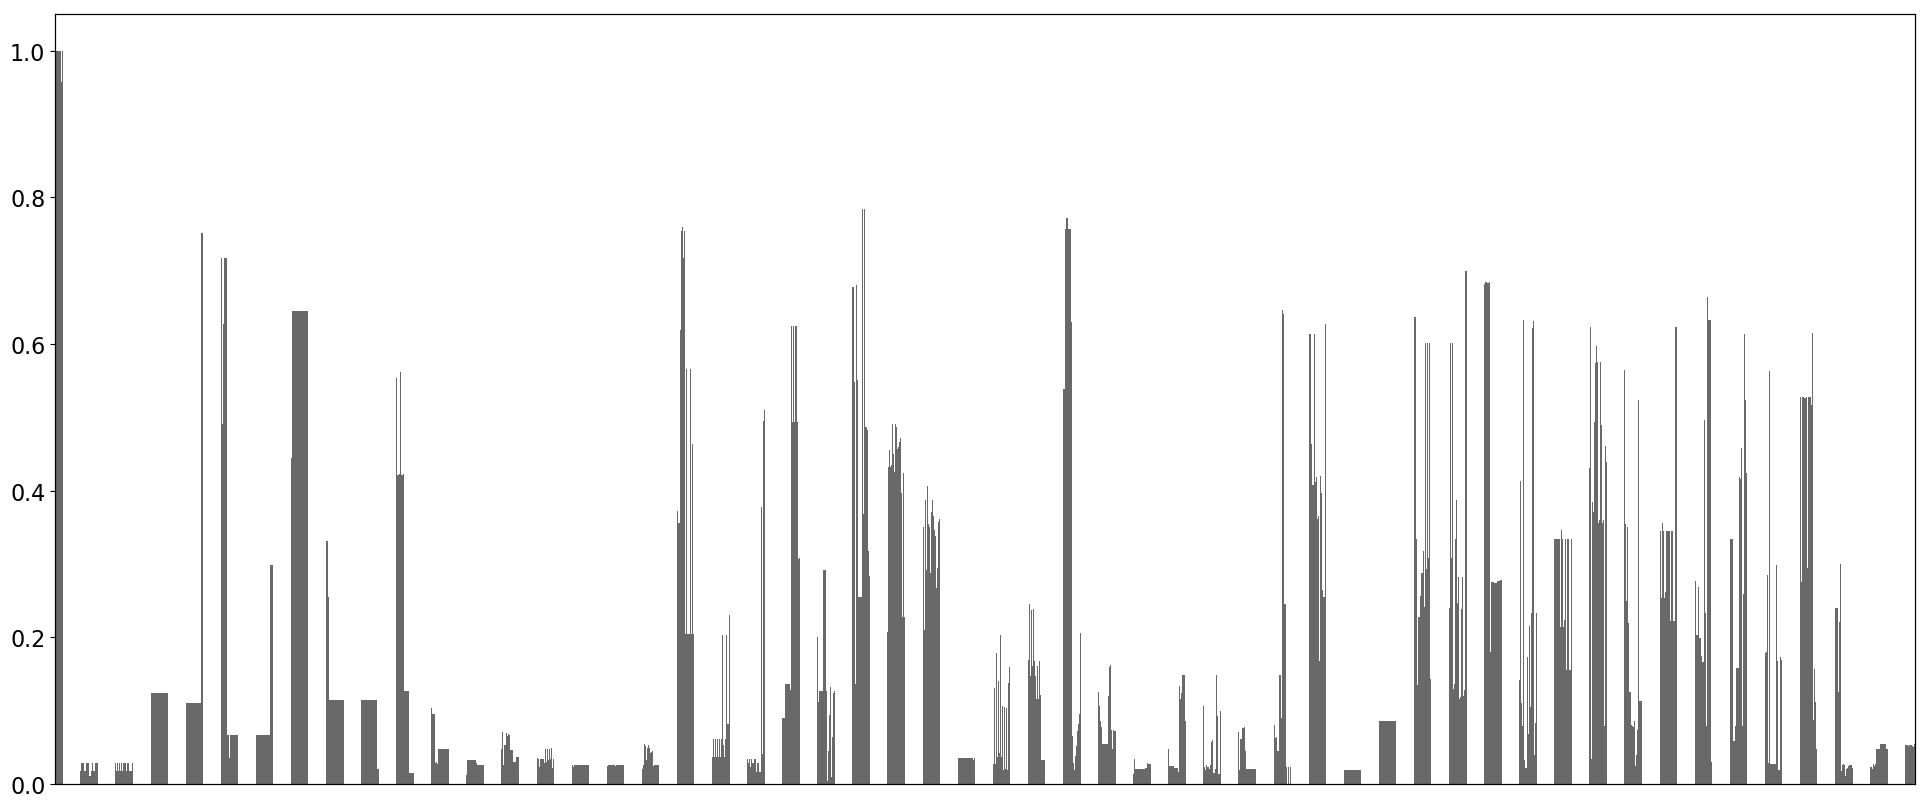

In [11]:
import missingno as msno

msno.bar(df)


In [ ]:
display(df.vdem_corr.describe())

df[df.cname=='Sudan'].vdem_corr

corr = df[['bci_bci', 'ti_cpi', 'vdem_corr', 'vdem_execorr', 'vdem_jucorrdc', 'vdem_pubcorr', 'wbgi_cce', 'ti_cpi_om', 'gle_cgdpc']].corr()
print(corr)

#display(df[df.ccode != df.ccode_qog].groupby('cname').mean())
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

sns.pairplot(df[['bci_bci', 'ti_cpi', 'vdem_corr', 'vdem_execorr', 'vdem_jucorrdc', 'vdem_pubcorr', 'wbgi_cce', 'ti_cpi_om', 'gle_cgdpc']])

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())